<a href="https://colab.research.google.com/github/tsenga2/keio-senga-seminar/blob/main/figure3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator
import seaborn
import collections
import math
import statistics
import requests
import io

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: numpy>=1.17 in c:\users\ichirokozakai\anaconda3\lib\site-packages (from matplotlib) (1.21.5)



In [ ]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [ ]:
url1="https://raw.githubusercontent.com/Icchi-Koza/seminar/master/Python%20in%20VScode/Kahle%20and%20Stultz/figure3.csv"
url2="https://raw.githubusercontent.com/Icchi-Koza/seminar/master/Python%20in%20VScode/Kahle%20and%20Stultz/figure3_2.csv"
dat1=pd.read_csv(url1,encoding='cp932')
dat2=pd.read_csv(url2,encoding='cp932')

In [ ]:
list1=[1, 2, 5, 6, 7, 9, 10]
col1=dat1.columns.tolist()
col2=[]
for i in list1:
  col2.append(col1[i])
dat1=dat1.loc[:,col2]

In [ ]:
list2=[1,2,5,6,7,8]
col3=dat2.columns.tolist()
col4=[]
for i in list2:
          col4.append(col3[i])
dat2=dat2.loc[:,col4]

In [ ]:
dat1.columns=['Name','FY','A(¥M)','FA(¥M)','PP&E(¥M)','Cash(¥M)','Inventory1(¥M)']
def f(a):
  return(a[:4])
dat1['FY']=dat1['FY'].apply(f)
dat2.columns=['Name','FY','M&FG(¥M)','Semi-FG&WIP(¥M)','Raw materials&P/M s(¥M)','REFS(¥M)']
dat2['FY']=dat2['FY'].apply(f)
dat3=dat1.set_index(['Name','FY'])
dat4=dat2.set_index(['Name','FY'])

In [ ]:
dat5=dat3.groupby('FY').sum()
dat5['FA/A']=dat5['FA(¥M)']/dat5['A(¥M)']
dat5['Cash/A']=dat5['Cash(¥M)']/dat5['A(¥M)']
dat5['Inventory1/A']=dat5['Inventory1(¥M)']/dat5['A(¥M)']
list3=list(range(1975,2021))

dat6=dat4.groupby('FY').sum()
dat6['Inventory2(¥M)']=dat6['M&FG(¥M)']+dat6['Semi-FG&WIP(¥M)']+dat6['REFS(¥M)']
dat7=pd.merge(dat5,dat6,how='outer',left_index=True,right_index=True)
dat7['Inventory2/A']=dat7['Inventory2(¥M)']/dat7['A(¥M)']
dat7['Inventory2/A']=dat7['Inventory2/A'].replace(0,np.nan)

* Refer [here](https://kentaro-wada.com/uscpa-8-inventory/) on the def. of Inventory2

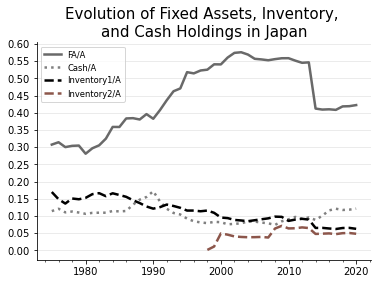

In [ ]:
%matplotlib inline
Figure, ax=plt.subplots()
ax.set_title('Evolution of Fixed Assets, Inventory, \nand Cash Holdings in Japan', fontsize=15.0, loc='center')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_yticks([0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6])
minor_locater=AutoMinorLocator(5)
ax.xaxis.set_minor_locator(minor_locater)
ax.grid(axis="y", alpha=0.3)
ax.plot(list3,dat7['FA/A'],c='dimgrey',label='FA/A',ls='-',lw=2.5)
ax.plot(list3,dat7['Cash/A'],c='grey',label='Cash/A',ls=':',lw=2.5)
ax.plot(list3,dat7['Inventory1/A'],c='k',label='Inventory1/A',ls='--',lw=2.5)
ax.plot(list3,dat7['Inventory2/A'],c='tab:brown',label='Inventory2/A',ls='--',lw=2.5)
ax.legend(fontsize='small')
plt.show()